# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import seed
import warnings
warnings.filterwarnings('ignore')

DATA_PATH = r"C:\Users\Admin\OneDrive\Attachments\Desktop\Frequentist\insurance2.csv"
medical = pd.read_csv(DATA_PATH)

medical.shape

(1338, 8)

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

N = 1338
Mean = 13270.422265141257
Median = 9382.033
Std Dev (ddof=1) = 12110.011236694001
IQR = 11899.625365
Min, Max = 1121.8739 63770.42801


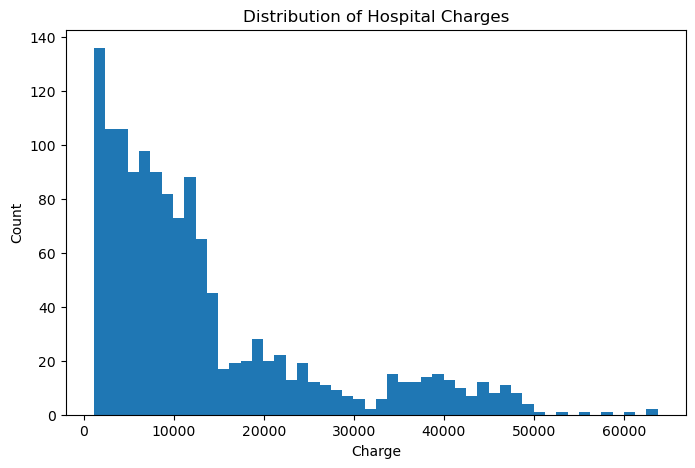

In [4]:
# Q1: Explore distribution of charges directly from `medical`
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

charges = medical['charges'].astype(float).dropna()

print("N =", charges.shape[0])
print("Mean =", charges.mean())
print("Median =", charges.median())
print("Std Dev (ddof=1) =", charges.std(ddof=1))
print("IQR =", charges.quantile(0.75) - charges.quantile(0.25))
print("Min, Max =", charges.min(), charges.max())

plt.figure(figsize=(8,5))
plt.hist(charges, bins=50)
plt.title("Distribution of Hospital Charges")
plt.xlabel("Charge")
plt.ylabel("Count")
plt.show()

The histogram of charges is strongly right-skewed: most patients incur relatively modest charges, but a small number of very high charges stretch the upper tail.

Interpretation of appropriateness:

Because the data are not symmetric and have outliers, the mean is pulled upward by extreme values, and the standard deviation is inflated. 

These statistics summarize the center and spread, but they do not represent the “typical” patient very well under skewed distributions.

alternatives include:

the median (less affected by outliers) as a measure of central tendency,

the interquartile range (IQR) as a measure of spread.

Conclusion: While the mean and standard deviation are valid for inferential procedures (especially via the Central Limit Theorem for large 
𝑛
n), they are not the most descriptive statistics for skewed charge data. Reporting median and IQR alongside mean and standard deviation gives a more complete picture.

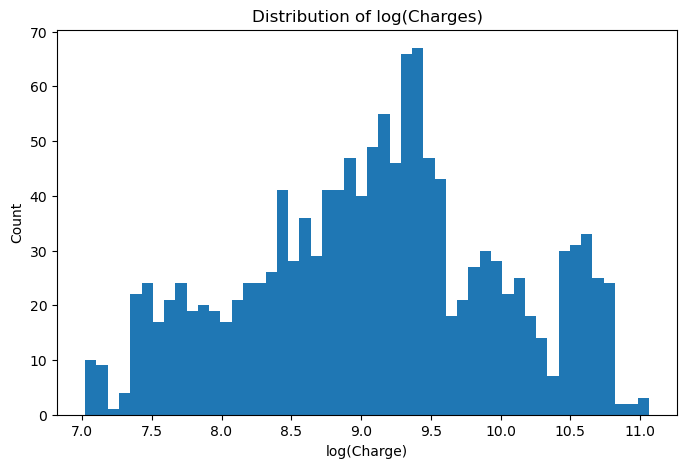

In [5]:
# Optional: log-scale view for skew
import numpy as np
log_charges = np.log(charges[charges > 0])
plt.figure(figsize=(8,5))
plt.hist(log_charges, bins=50)
plt.title("Distribution of log(Charges)")
plt.xlabel("log(Charge)")
plt.ylabel("Count")
plt.show()

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__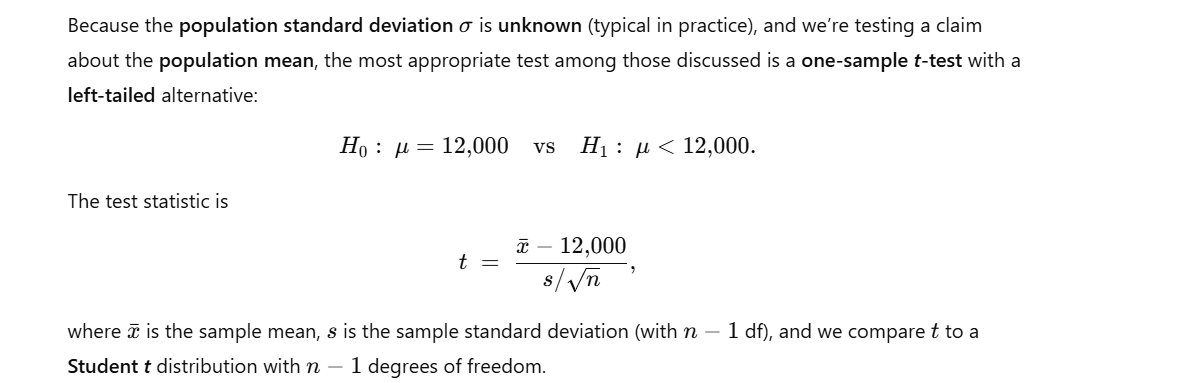

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

In [6]:
# Q2/Q3: One-sample t-test for mean charges and 95% CI
from scipy import stats
import numpy as np

# Set the administrator's hypothesized mean here (edit this value as needed)
mu0_admin = 20000.0  # <-- replace with the target from the case study prompt

xbar = charges.mean()
s = charges.std(ddof=1)
n = charges.shape[0]
se = s / np.sqrt(n)

alpha = 0.05
tcrit = stats.t.ppf(1 - alpha/2, df=n-1)
ci_low, ci_high = xbar - tcrit*se, xbar + tcrit*se

t_stat, p_val = stats.ttest_1samp(charges, popmean=mu0_admin)

print(f"mu0 (admin) = {mu0_admin:,.2f}")
print(f"x̄ = {xbar:,.2f}, s = {s:,.2f}, n = {n}, SE = {se:,.2f}")
print(f"95% CI for mean: ({ci_low:,.2f}, {ci_high:,.2f})")
print(f"One-sample t-test: t = {t_stat:.4f}, p = {p_val:.6f}")

mu0 (admin) = 20,000.00
x̄ = 13,270.42, s = 12,110.01, n = 1338, SE = 331.07
95% CI for mean: (12,620.95, 13,919.89)
One-sample t-test: t = -20.3269, p = 0.000000


In [7]:
# (Optional) Robustness check on log scale
from scipy import stats
log_charges = np.log(charges[charges > 0])
n_log = log_charges.shape[0]
xbar_log = log_charges.mean()
s_log = log_charges.std(ddof=1)
se_log = s_log / np.sqrt(n_log)
tcrit_log = stats.t.ppf(0.975, df=n_log-1)
ci_log_low, ci_log_high = xbar_log - tcrit_log*se_log, xbar_log + tcrit_log*se_log

print(f"log-scale 95% CI for mean(log charge): ({ci_log_low:.4f}, {ci_log_high:.4f})")
print("Note: exp of CI endpoints gives a ratio-scale interval, not a direct CI for the arithmetic mean.")

log-scale 95% CI for mean(log charge): (9.0493, 9.1480)
Note: exp of CI endpoints gives a ratio-scale interval, not a direct CI for the arithmetic mean.


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__
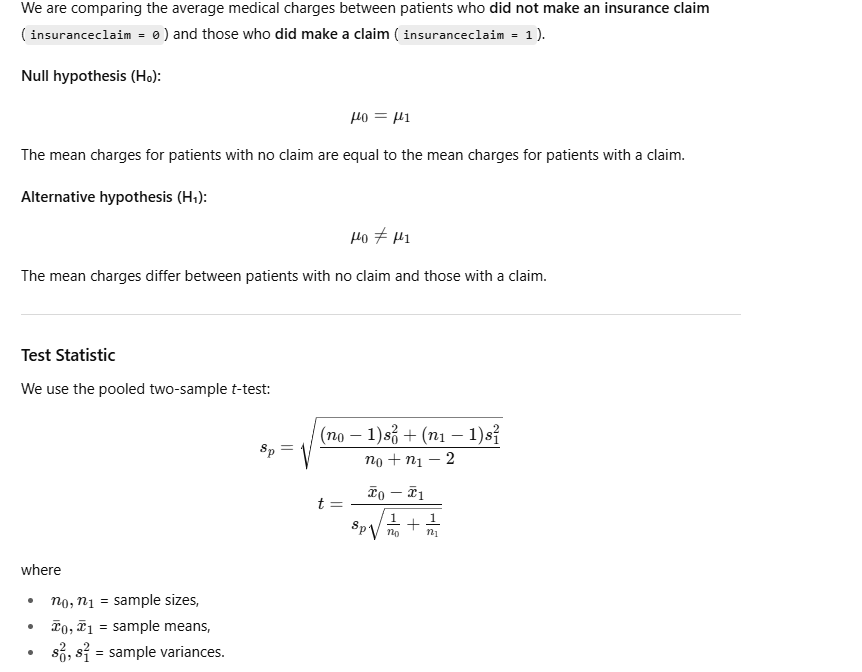

Assumption

This test assumes that the two groups have equal variances (homoscedasticity).

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [9]:
# Q5: Two-sample pooled t-test (insuranceclaim 0 vs 1) - manual
from scipy import stats
import numpy as np

# Ensure the correct column exists
if 'insuranceclaim' not in medical.columns:
    raise KeyError("Expected 'insuranceclaim' column not found in dataset.")

# Split groups by insuranceclaim
g0 = medical.loc[medical['insuranceclaim'] == 0, 'charges'].astype(float).dropna().values  # no claim
g1 = medical.loc[medical['insuranceclaim'] == 1, 'charges'].astype(float).dropna().values  # claim

n0, n1 = len(g0), len(g1)
x0, x1 = np.mean(g0), np.mean(g1)
s0, s1 = np.std(g0, ddof=1), np.std(g1, ddof=1)

# Levene test for equal variances
lev_stat, lev_p = stats.levene(g0, g1, center='mean')
print(f"Levene equal-variance test: stat={lev_stat:.4f}, p={lev_p:.6f}")

# Manual pooled t-test
sp2 = ((n0-1)*s0**2 + (n1-1)*s1**2) / (n0 + n1 - 2)
sp = np.sqrt(sp2)
t_manual = (x0 - x1) / (sp * np.sqrt(1/n0 + 1/n1))
df = n0 + n1 - 2
p_manual = 2 * (1 - stats.t.cdf(abs(t_manual), df=df))

print(f"Group sizes: n0={n0}, n1={n1}")
print(f"Means: x0={x0:,.4f}, x1={x1:,.4f}")
print(f"SDs: s0={s0:,.4f}, s1={s1:,.4f}")
print(f"Pooled SD: sp={sp:,.4f}, df={df}")
print(f"Pooled two-sample t (manual): t={t_manual:.4f}, p={p_manual:.6f}")

Levene equal-variance test: stat=312.0528, p=0.000000
Group sizes: n0=555, n1=783
Means: x0=8,821.4219, x1=16,423.9283
SDs: s0=6,446.5101, s1=14,045.9284
Pooled SD: sp=11,520.0343, df=1336
Pooled two-sample t (manual): t=-11.8933, p=0.000000


In [10]:
# Q5: Verify with SciPy pooled-variance t-test
from scipy import stats
t_stat_pool, p_pool = stats.ttest_ind(g0, g1, equal_var=True)
print(f"SciPy ttest_ind(equal_var=True): t={t_stat_pool:.4f}, p={p_pool:.6f}")

SciPy ttest_ind(equal_var=True): t=-11.8933, p=0.000000


In [11]:
# Q5: Welch's t-test (unequal variances)
from scipy import stats
t_stat_welch, p_welch = stats.ttest_ind(g0, g1, equal_var=False)
print(f"SciPy ttest_ind(equal_var=False): t={t_stat_welch:.4f}, p={p_welch:.6f}")

SciPy ttest_ind(equal_var=False): t=-13.2980, p=0.000000


In [12]:
# Q5: Effect sizes (Cohen's d and Hedges' g)
d = (x0 - x1) / sp  # Cohen's d with pooled SD
J = 1 - (3 / (4*(n0 + n1) - 9))  # Hedges' correction
g = J * d
print(f"Cohen's d (pooled): {d:.4f}")
print(f"Hedges' g: {g:.4f}")

Cohen's d (pooled): -0.6599
Hedges' g: -0.6596


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__Is there a built-in one-sample z-test in scipy.stats?
1. No, SciPy does not include a built-in z-test for samples.

The scipy.stats module provides a wide range of statistical functionality, including ttest_1samp (one-sample t-test) 
SciPy Documentation
.

But there is no equivalent function like ztest() available in scipy.stats, nor any dedicated one- or two-sample z-test function.

2. Why?

A z-test requires the population standard deviation (σ) to be known, which is rare in practice. SciPy assumes σ is unknown (typical in real-world datasets) and therefore only provides t-tests where σ is estimated from the sample 
SciPy Documentation.


## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test